<a href="https://colab.research.google.com/github/myazdani/pytorch-deep-learning/blob/master/pytorch_chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3

# The Artificial Neuron


At the heart of deep learning is the single artificial neuron. When these "neurons" are connected together to form a network of neurons, we can perform many useful machine learning tasks. People will often instead of neuron use terms such as "neuronal element", "neuronal unit" or just simply "unit." It's important to remember that regardless of the jargon, the "artificial neurons" that we refer to in deep learning are massive oversimplifications from biological neurons. It is best to think of artificial neurons as metaphors. This is because the computations in artificial neurons are not only oversimplified, but ignore many details as to how neurons are activated and information processing takes place in brains.

At a high level, the artificial neuron is either "excited" or "quiescent" to input that it receives. This terminology is analogous to a biological neuron "firing." While Binary Neurons are strictly either "on" or "off" (that is, they are either firing or not) most neuronal elements used in deep learning are analogs between being activated or not. Let's take a look at what one of these neurons look like:



![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/ArtificialNeuronModel_english.png/640px-ArtificialNeuronModel_english.png)


The inputs $x_1, \ldots, x_n$ the neuron receives will either excite the neuron or not. In this case we have drawn ta that neuron receives $n$ inputs that are just floats. The neuron pays "attention" to each of the inputs with the synaptic weights $w_1, \ldots, w_n$. If one of the weights $w_i = 0$ then the neuron is paying NO attention to input $x_i$. The bigger the value of $w_i$ the more influence input $x_i$ has on the neuron. These weights are analogous to "synapses" in biological neurons, so you will often here them referred to as "synaptic weights"

The total state of the neuron is the sum of all the inputs $x_1, \ldots, x_n$ the neuron receives weighted by the synaptic weights of the neuron. This is mathematically represented as

$s = w_n x_n + \ldots + w_1 x_1 + w_0$


You'll notice the $w_0$ synaptic weight has no input associated with it. You can think of this as the "baseline" of the neuron of how sensitive it is for being excited. This term is often referred to as the "bias" term and mathematically it is equivalent to the "intercept" term that we discussed at length in the previous chapter for linear equations (the $b$ in the famous $y = mx + b$ equation). Mathematically, we can re-express the state of the neuron as:

$s = w_n x_n + \ldots + w_1 x_1 + w_0 = \sum_{i=0}^{n}w_{i}x_{i}$

where we have defined $x_0 = 1.0$ that gets multiplied by the bias term $w_{0}$. We can further equivalently write this as:

$s = \sum_{i=0}^{n}w_{i}x_{i} = \mathbf{w}^{T}\mathbf{x}$

Where we now say that the state of the neuron is the *inner produt* or *dot product* between the synaptic *weight vector* $\mathbf{w}$ and $\mathbf{x}$ where

$\mathbf{w} = \begin{bmatrix}
w_0\\ 
w_1 \\
\vdots\\ 
w_{n}
\end{bmatrix} $

and

$\mathbf{x} = \begin{bmatrix}
1.0\\
x_1 \\
\vdots\\ 
x_{n}
\end{bmatrix} $


This may seem like a frivolous mathematical exercise, but the interpretation of viewing the state of the artificial neuron as the inner product between an input vector $\mathbf{x}$ and a synaptic weight vector $\mathbf{w}$ is extremely helpful. Let's review some of the key concepts behind the dot product. Recall that vectors are just directions in a vector space along with a magnitude. Below is a toy example of a two dimensional synaptic weight vector $\mathbf{w}$ and the input vector $\mathbf{x}$

![alt text](http://img.sparknotes.com/figures/1/13493b46f82b15be90229290a86eb26a/dotproduct.gif)

Notice that these two vectors can point anywhere. But when the synaptic weight vector $\mathbf{w}$ and the input vector $\mathbf{x}$ are *aligned* and pointing in the same direction, then in some sense they are pointing the same direction and are providing the same piece of information. The dot product is a measure of how much the synaptic weight vector $\mathbf{w}$ and the input vector $\mathbf{x}$ are aligned. In this sense, the neuron with its synaptic weights $\mathbf{w}$ will maximally fire when the input vector $\mathbf{x}$ is in agreement with it.


So the state of the neuron is determined by the inner product operation between the synaptic weights of the neuron with the incoming input vector. The inner product does not restrict the values of the state of the neuron, so the state can be either very small and negative or very large and positive. Typically to mimic the behavior of biological neurons, a non-linear "activation function" is applied to it to restrict the output of the neuron to be either firing/active or not. As the name suggests, the purpose of the activation function is to determine if the neuron should be active or not. So the final output of the artificial neuron then becomes:

$z = \sigma(\mathbf{w}^{T}\mathbf{x})$


Historically, the sigmoid function (that has values between 0 and 1) was originally used but for technical reasons any non-polynomial non-linear function can be used as an activation function. A popular activation function is the hyperbolic tangent that we will use an example.

$z = \tanh(\mathbf{w}^{T}\mathbf{x})$

Let's take a look at what this function looks like in the simplest case where we have one input:

$z = \tanh(xw_1 + w_0)$

Since we only have one input $x$ we only have one synaptic weight $w_0$ associated with it (and $w_0$ is our bias term)

Let 's visualize a simple case where the bias term $w_0 = 0$ and $w_1 = 1.0$.

In [0]:
import numpy as np

import torch 

import matplotlib.pyplot as plt;
%matplotlib inline


In [0]:
#x = torch.linspace(-3, 3, steps=5000, requires_grad=True)
x = torch.linspace(-3, 3, steps=5000)

z1 = torch.tanh(x)

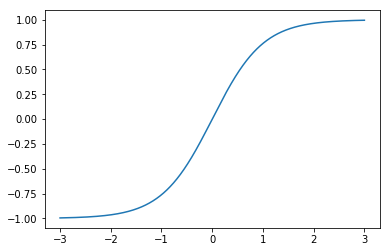

In [0]:
plt.plot(x.detach().numpy(),z1.detach().numpy());

If you are familiar with NumPy's `linspace`, you'll notice that `torch.linspace` is very similar. We have created a torch tensor `x` that has 5,000 equally spaced values between -3.0 and 3.0 - if you are having a hard time understanding this, just try printing out the values of `x` and test your understanding with toy cases such as `torch.linspace(-3, 3, steps=3)`.

`torch.tanh` then applies the hyperbolic tangent function to each the elements in `x` to create the output tensor `z1`. Keep in mind that in this case even though `x` is a torch tensor with 5,000 elements, we are still in the 1-dimensional input case. We are just trying to show what the output of this single 1-dimensional neuron would be for 5,000 different values.

The more "technically correct" way of showing the output of a single 1-dimensional neuron would be using a for loop such as:

In [0]:
outputs = []

for i in range(5000):
    outputs.append(torch.tanh(x[i]))

But using such a for loop is computationally much more expensive and cumbersome. 

In the above figure we show what the output of the neuron is for various values of inputs when the neuron has the specific synaptic weights of $w_1 = 1.0$ and $w_0 = 0$. You will notice that the output of the neuron is between two extremes: -1.0 and positive 1.0. Any input that is bigger than 3 or smaller than -3 will result in positive 1.0 or -1.0 respectively. Any input between -3.0 and 3.0 on the other hand will yield an out of a value between -1.0 and 1.0 for this neuron.

You will often hear people refer to the output state of the neuron being "saturated" when the output is 1.0 or -1.0. These two states can be thought of as being analogous to the neuron being active or not. But the analogy stops there since the hyperbolic tangent is an example of a "soft" activation function as being in either state is a *soft* decision between the two extreme states. 


What if we have a neuron that has the following synaptic weights:

$ z = tanh(10x - 10)$

that is, $w_1 = 10.0$ and $w_0 = -10.0$?

Below we show the output of this neuron and compare it with the original:

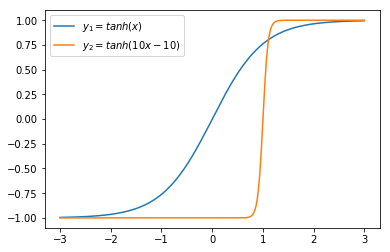

In [0]:
z2 = torch.tanh(10*x-10)

plt.plot(x.detach().numpy(),z1.detach().numpy(), label = "$y_1 = tanh(x)$");
plt.plot(x.detach().numpy(),z2.detach().numpy(), label = "$y_2 = tanh(10x - 10)$");
plt.legend();

We can see that changing the synaptic weight $w_0$ has the effect of shifting the output activity of the neuron (to the right in this case) and $w_1$ has the effect of affecting the rate at which the output of the neuron switches between -1.0 and 1.0. In other words, adjusting the synaptic weights has the effective of shifting the neuron around in input space and controlling for the *sensitivity* of the neuron switching between the two states.

Now lets add one more neuron to the output of this neuron:

<br>

This neuron has the identity activation function so the output is just the input $ z = \sigma(z).$ Mathematically, the input and output of our two neurons can be expressed as follows:

$y = u_1 tanh(w_1 x + w_0) + u_0 = u_1z + u_0$

in the right hand side you may notice a pattern that we have seen before: we have again the inner product of the synaptic weights of our second neuron with the output of the neuronal activity of the first neuron. In other words, the first neuron maps the inputs to $z$, an *intermediate representation* and then the second neuron maps this intermediate representation to the output $y$. This pattern of mapping the inputs to an intermediate representation followed by a final output is at the heart of deep learning.

Let's consider an example where $u_1 = 0.5$ and $u_0 = 10$ for the output neuron and we use the simple first neuron that we considered:

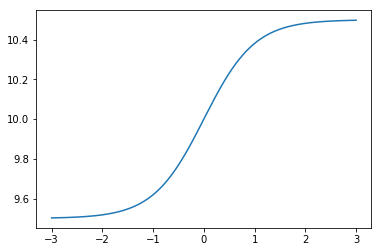

In [0]:
y = .5*z1 + 10

plt.plot(x.detach().numpy(),y.detach().numpy());

The shape of the output of looks very similar to what we had before but now notice the range of the vertical axis: instead of being limited to -1.0 and +1.0 it is now roughly between  9.5 and 10.5. This is because this output neuron is controlling where to place the hyperbolic tangent in the output space. 

Let's now also feed the second neuron to this output neuron so both are combined:

$y = u_2 z_2 + u_1z_1 + u_0$

Obviously since we are adding an additional source input (originating from the second neuron), we need an additional synaptic weight which is $u_2$. Let's select $u_2 = -0.5$ and plot the total output:

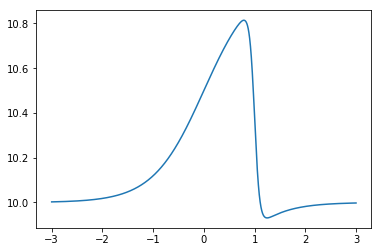

In [0]:
y = -.5*z2 + .5*z1  + 10
plt.plot(x.detach().numpy(),y.detach().numpy());

This is a shape that is completely different from the hyperbolic tangents that we have been seeing! Adding an additional neuron has allowed us to express a function beyond just the hyperbolic tangent. In fact, the more neurons we include, the more "expressive" we can make the functional output. This idea has been proved as the "universal approximator theorem": the idea is that we can approximate any smooth function if we have enough neurons.

In practice this theorem is not used often since the theorem does not give us any insight into *how* many neurons we need to express an arbitrary function. Nevertheless, such a result brings us the guarantee that if we have enough neurons in our network then we can approximate any practical function we observe in the real world (there may be some mathematical monstrosities with many sharp discontinuities that may be infeasible to reconstruct, but such oddities are rarely observed in practice).






So far we have only considered single inputs. Let's consider the more general case where we have $n$ inputs and lets consider the case where we have $m$ hidden neurons. We can mathematically express the $m$ hidden states of this network as:

$s_1 = w_{1}^{T}x$ <br>
$s_2 = w_{2}^{T}x$ <br>
$\vdots$ <br>
$s_m = w_{m}^{T}x$ <br>

Using matrix notation we can more compactly write this as:

$\begin{bmatrix}
s_1\\ 
s_2\\ 
\vdots\\ 
s_m
\end{bmatrix} = \begin{bmatrix}
w_1^{T}\\ 
w_2^{T}\\ 
\vdots\\ 
w_m^{T}
\end{bmatrix} x$

Let's unpack this a bit: each $w_1$, $w_2$, $\ldots$, $w_m$ are the set (vector) of synaptic weights associated with each of the $m$ neurons. We have $m$ neurons so we also have $m$ states $s_1$, $s_2$, $\ldots$, $s_m$ associated with each of these neurons. Recall that each neuron is paying "attention" to the input based on the neuron's synaptic weights. This act of paying attention is done through the dot product operation. In other words, each of the states $s_i$ is measuring how much alignment there is between the input $x$ and the the neuron's synaptic weights $w_i$.

It turns out this type of operation, measuring alignment of an input vector against a set of "reference vectors" (which in our case the reference vectors are the synaptic weights), is a very common operation in linear algebra. In fact, in linear algebra, such a transformation is typically referred to as a *basis transformation*. It is illustrative to think of these concepts pictorially for a special transformation call the *Fourier Transform*.

In the Fourier Transform, an input signal (which on a computer is represented as an array or just a vector) is decomposed into a set of sinusoids. This transformation roughly as a cartoon looks something like this:




![alt text](https://pbs.twimg.com/media/D15-WtuU0AAs6e3.jpg:small)

Here we are repeating the equation that we had previously but are actually drawing out the values the synaptic weights and an example input. The synaptic weights are sinusoids at different frequencies starting from the DC signal at the very top (just flat), followed by a slowly oscillating sinusoid, and then ending with a very fast sinusoid. The input signal looks like a combination of a slowly moving sinusoid plus a little bit of a high frequency sinusoid. The "output" of this transformation in the left-hand-side then shows us that this input signal is not well-aligned with most of the sinusoids except for a few (ie, most of the sinusoids are not aligned with the input and hence are zeros).

This is just a cartoon example, but such a transformation is at the heart of all transformation in deep learning. The major difference in deep learning is that the synaptic weights are not fixed to be sinusoids at different frequencies, but rather they are *learned*.


Once we have computed the transformation, we compute the hidden representation of the input by passing the states to the non-linear activation functions:

$\begin{bmatrix}
z_1\\ 
z_2\\ 
\vdots\\ 
z_m
\end{bmatrix} = \begin{bmatrix}
\sigma(s_1)\\ 
\sigma(s_2)\\ 
\vdots\\ 
\sigma(s_m)
\end{bmatrix} $

$z_1, z_2, \ldots, z_m$ is the hidden representation of the input. To get a desired output, we pass this hidden representation to a final output neuron.

$y = u^{T}\mathbf{z}$

where $\mathbf{z} = \begin{bmatrix}
1.0\\
z_1 \\
\vdots\\ 
z_{n}
\end{bmatrix} $

and we have augmented the constant 1.0 with the hidden representation for the bias of the output neuron.


The example we have can be expressed compactly in PyTorch as:


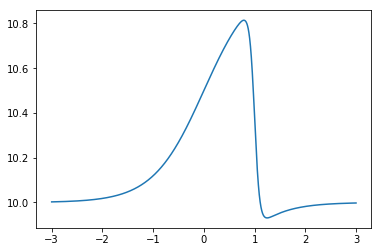

In [0]:

W = torch.tensor([[10, -10], [1, 0]], dtype = torch.float32)
u = torch.tensor([-.5, .5, 10], dtype = torch.float32)


x_aug = torch.cat((x[None,:],torch.ones_like(x)[None,:]), 0)

z = torch.tanh(torch.mm(W, x_aug))
z_aug = torch.cat((z, torch.ones(z.size()[1])[None,:]), 0)

y = torch.mm(u[None,:],z_aug).squeeze()


plt.plot(x.detach().numpy(),y.detach().numpy());

# MNIST digit classificaiton


The MNIST dataset is a popular dataset used to benchmark machine learning algorithms. The training set of the dataset consists of 60,000 hand drawn characters of the digits 0-9 on gray-scale 28-by-28 pixel images. One of the images looks something like this:

![alt text](https://raw.githubusercontent.com/rohan-varma/rohan-blog/master/images/mnistimg.png)



We would like to design a neural network that can classify which digit is drawn from the pixels of the images. 

This dataset has been enormously popular since its inception and is always used as a first step for understanding a new algorithm. Given its popularity, this dataset is included as a subclass in `torch`. 

In [0]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

The `datasets` class in `torch` includes an `MNIST` module that will return a PyTorch  `dataset` and handle the downloading of the train and validation datasets. 

In [0]:
train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=transforms.ToTensor())

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=transforms.ToTensor())

0it [00:00, ?it/s]

9920512it [00:01, 8412693.18it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 135522.66it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2201462.39it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 50661.19it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


Once you have the these dataset objects prepared, you can create a `DataLoader` object from them that you can iterate through the different examples when you trian the network with a specified batch size. In this case we will haev a batch size of 32 examples and we have also specified that we want to shuffle the training data after every epoch by setting `shuffle = True`. 

In [0]:

batch_size = 32



train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False)

Now that we have our data loading and preparation objects ready, we need to specify a network architecture. Here is a simple single hidden layer with a `tanh` activation function. This is a standard Multi-Layer Perceptron (MLP) architecture Recall that when we create Networks in PyTorch we inherit from the `nn.Module`. Here we define our network as a class called `DigitsNet`:

In [0]:
class DigitsNet(nn.Module):
    def __init__(self, num_hidden, input_size = 28*28, num_classes = 10):
        super(DigitsNet, self).__init__()
        self.num_hidden = num_hidden
        self.input_size = input_size
        self.num_classes = num_classes
        
        self.fc1 = nn.Linear(self.input_size, self.num_hidden)
        self.fc2 = nn.Linear(self.num_hidden, self.num_classes)

    def forward(self, x):
        x = x.view(-1, self.input_size)
        z = torch.tanh(self.fc1(x))
        return F.log_softmax(self.fc2(z), dim=1)

As discussed earlier, when inherriting from `nn.Module`, we need to specify two methods: `__init__` and `forward`. In the `__init__` method you always want to call `super` to have access to the inherrited methods in `nn.Module`.  As is typical in `__init__` methods, you will also want to specify the instance variables for the class. The `DigitsNet` class allows users to create different networks based on three network hyperparameters:
- `num_hidden`: we can specify how many hidden units the hidden layer should have 
- `input_size`: the number of inputs the network will receive. Since we will be using `DigitsNet` for the MNIST dataset, the type of data that is passed as input to the network is always fixed. Each image is a 28-by-28 grayscale image. Because we are using an MLP architecture, the input shape needs to be 1-D array, and so we reshape the 28-by-28 2D array into a 1D vector of shape `28*28 = 784`. So by default we have the `input_size` be set to 784.
- `num_classes`: The number of classes we wantt to predict. Since we will be using `DigitsNet` for MNIST and there are only 10 digits, we set the default number of classes to 10. 


Now that we have defined the class, let's make a `DigitsNet` object and call it a `model` with 1000 hidden units. We also want to put this model on the GPU which can with the `to` method. Note that we didn't have to write the `to` method since `DigitsNet` inherits from `nn.Module`. 

In [0]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    
model = DigitsNet(num_hidden=10000).to(device)    

print(model)

DigitsNet(
  (fc1): Linear(in_features=784, out_features=10000, bias=True)
  (fc2): Linear(in_features=10000, out_features=10, bias=True)
)


We next define the optimizer that ew want to use (simple SGD in this case) and the loss function: 

In [0]:

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

Now that we have defined the model, the optimizer, and the loss function that we want to minimize, we write some helper functions for computing the training step and validation step when training the network. We call the `train` function for every epoch of training and also specify how often we want to print the progress of training with the `log_interval` parameter (set to every 200 batches by default).

In [0]:
def train(epoch, log_interval=200):
    # Set model to training mode
    model.train()
    
    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # Copy data to GPU if needed
        data = data.to(device)
        target = target.to(device)

        # Zero gradient buffers
        optimizer.zero_grad() 
        
        # Pass data through the network
        output = model(data)

        # Calculate loss
        loss = criterion(output, target)

        # Backpropagate
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))
            
            

           

We similarly have the helper function `validate` where we compute the validation loss for every epoch. 

In [0]:
def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy)) 

Now we finally iterate through training the network! In our illustrative example we will only train for 5 epochs but in practice you  will want to train for more.

In [0]:
%%time
epochs = 5

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.304025
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.768343
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.381467
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.332935
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.374648
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.403438
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.437832
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.196312
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.161528
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.377965

Validation set: Average loss: 0.3109, Accuracy: 9111/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.487841
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.483424
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.333753
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.200992
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.110567
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.125804
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.396206
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.292536
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.49

After 5 epochs, we can plo how the loss and accuracy changed for each epoch:

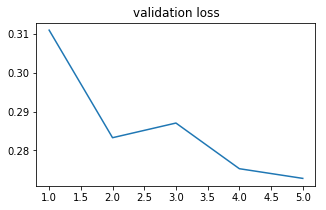

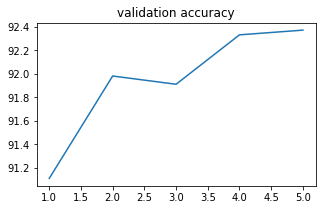

In [0]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');

# Weight initialization in neural networks


The result of the neural network can be very sensitive to how weights are initialized. There are many different strategies for initializing the weights of a neural network and PyTorch provides convincience functions for the more popular initialization schemes. The `torch.nn.init` module contains a number of these functions. 



- `torch.nn.init.uniform_(tensor, a=0, b=1)`
- `torch.nn.init.normal_(tensor, mean=0, std=1)`
- `torch.nn.init.constant_(tensor, val)`
- `torch.nn.init.eye_(tensor)`
- `torch.nn.init.dirac_(tensor)`
- `torch.nn.init.xavier_uniform_(tensor, gain=1)`
- `torch.nn.init.xavier_normal_(tensor, gain=1)`
- `torch.nn.init.kaiming_uniform_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')`
- `torch.nn.init.kaiming_normal_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')`
- `torch.nn.init.orthogonal_(tensor, gain=1)`
- `torch.nn.init.sparse_(tensor, sparsity, std=0.01)`

For example, if we want to create a tensor that has Identity initialization from a normal distribution, we just run:

In [0]:
w = torch.empty(5, 5)
torch.nn.init.eye_(w)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

If we want to initialize a tensor to be from a uniform distribution between the values of -3 and -2 (for exmaple), then we similarly execute:

In [0]:
w = torch.empty(5, 5)
torch.nn.init.uniform_(w, a = -3, b = -2)

tensor([[-2.5619, -2.5951, -2.9953, -2.0815, -2.4360],
        [-2.6373, -2.0486, -2.6107, -2.3840, -2.5237],
        [-2.0752, -2.1740, -2.0585, -2.3693, -2.1509],
        [-2.6660, -2.9415, -2.6313, -2.0703, -2.8004],
        [-2.2263, -2.8522, -2.4063, -2.9217, -2.2011]])

If we want to apply a spefic type of intialization for a layer object, we have to apply the `torch.nn.init` function on the parameters instance variable of the layer object. For example, for the MLP where we use two linear layers, if we want to initialize the first linear layer `self.fc1` weight, we have to access the instanance variable `self.fc1.weight` to then pass to the desired initialization scheme we want. In the case of using a Normal Xavier initialization, we can simply just do `torch.nn.init.xavier_normal_(self.fc1.weight)` as part of the constructor of the `Net` class that we define. 

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 10000)
        torch.nn.init.xavier_normal_(self.fc1.weight)
        self.fc2 = nn.Linear(10000, 10)
        torch.nn.init.xavier_normal_(self.fc2.weight)

    def forward(self, x):
        x = x.view(-1, 28*28)
        z = torch.tanh(self.fc1(x))
        return F.log_softmax(self.fc2(z), dim=1)

model = Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=10000, bias=True)
  (fc2): Linear(in_features=10000, out_features=10, bias=True)
)


In [0]:
%%time
epochs = 5

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.328075
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.463218
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.410965
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.502680
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.337229
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.263605
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.369612
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.245538
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.176293
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.240620

Validation set: Average loss: 0.3053, Accuracy: 9146/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.149343
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.254558
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.478351
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.206843
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.421685
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.285438
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.427840
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.102139
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.17

And we finally visualize the losses and accuracy as epochs proceed:

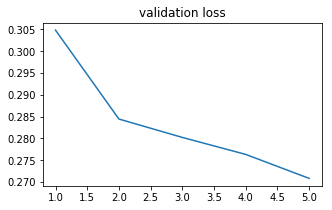

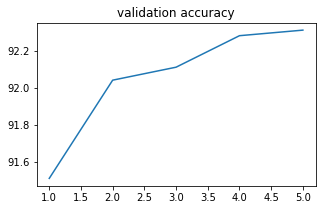

In [0]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');

# Batch Normalization


The effectiveness of a neural network  is crucial to ensuring that the input activity of the neuron is within a "sweet spot" - that is, it it not too large or too small. This is because if the input activities of the network are uncontrolled, then during learning the training may suffer from the "vanishing gradient" or "exploding gradient" problem that makes learning difficult. 

A popular method to ensure the dynamic range of inputs that a neuron id within a standard range is Batch Normalization. Batch Normalization in PyTorch is simply an additional layer that we typically apply before applying the activtion function (although some argue it should be applied after). What Batch Normalization in a layer does is:

$y = \frac{x - E[x]}{\sqrt{\text{Var}[x] + \epsilon}}\gamma + \beta$

where $E[x]$ is the mean of $x$ and $\text{Var}[x]$ is the variance.  The fraction $\frac{x - E[x]}{\sqrt{\text{Var}[x] + \epsilon}}$ is referred to as z-scaling that scalies $x$ to have mean zero and variance 1.0. The $\gamma$ and $\beta$ parameters are learned by the network to scale. Learning $\gamma$ and $\beta$ makes re-scaling the input activity to the neuron adaptive to the problem at hand and the particularities of the distributions and as a result Batch Normalization is popular in practice. 

In PyTorch we can use the `torch.nn.BatchNorm1d` class to create a layer object for the MLP network. As all layers, we define thie layer object in the constructor of the class and apply it before the activation function. 


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 10000)
        self.bn = nn.BatchNorm1d(10000)
        self.fc2 = nn.Linear(10000, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        z = torch.tanh(self.bn(self.fc1(x)))
        return F.log_softmax(self.fc2(z), dim=1)

model = Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=10000, bias=True)
  (bn): BatchNorm1d(10000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=10000, out_features=10, bias=True)
)


In [0]:
%%time
epochs = 5

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
    

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.297954
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.506541
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.233830
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.087720
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.440294
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.409432
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.338258
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.257217
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.113326
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.260220

Validation set: Average loss: 0.2698, Accuracy: 9198/10000 (92%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.180472
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.298486
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.170667
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.151286
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.166519
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.340997
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.278506
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.033884
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.24

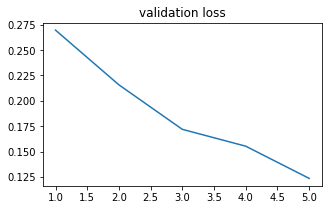

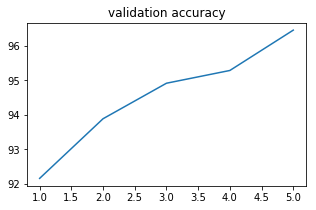

In [0]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');

# ResNet


The ResNet architecture is a slight modification to the original MLP architecture, but has been shown to be extremely effective for training deep networks. A ResNet introduces an additional *skip* connection that preserves a representation of an input. 

Specifically the network ResNet layer is as follows:

$y = f(x) + x$

Where $x$ is the hidden representation and $f(\cdot)$ is the activatvation function. There are several reasons why including such a direct connection to the output is interesting. One idea might be that $x$ already may have information that is valuable that we want to keep in the forward pass. Another idea is that during the backward pass, such additive connections ensure that gradients flow back. This latter point is especially beneficial for deeper networks and may hence explain their popularity in deeper networks. 

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 1000)
        self.bn1 = nn.BatchNorm1d(1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.bn2 = nn.BatchNorm1d(1000)
        self.fc3 = nn.Linear(1000, 1000)
        self.bn3 = nn.BatchNorm1d(1000)
        self.fc4 = nn.Linear(1000, 1000)
        self.bn4 = nn.BatchNorm1d(1000)
        self.fc5 = nn.Linear(1000, 1000)
        self.bn5 = nn.BatchNorm1d(1000)
        self.fc6 = nn.Linear(1000, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        z = self.bn1(torch.tanh(self.fc1(x)))
        z = self.bn2(torch.tanh(self.fc2(z)) + z)
        z = self.bn3(torch.tanh(self.fc3(z)) + z)
        z = self.bn4(torch.tanh(self.fc4(z)) + z)
        z = self.bn5(torch.tanh(self.fc5(z)) + z)
        
        return F.log_softmax(self.fc6(z), dim=1)

model = Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=1000, bias=True)
  (bn1): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (bn2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=1000, out_features=1000, bias=True)
  (bn3): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=1000, out_features=1000, bias=True)
  (bn4): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc5): Linear(in_features=1000, out_features=1000, bias=True)
  (bn5): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc6): Linear(in_features=1000, out_features=10, bias=True)
)


In [0]:
%%time
epochs = 5

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
    

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.288976
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.230527
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.737520
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.240840
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.179574
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.508189
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.390032
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.544935
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.069176
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.052319

Validation set: Average loss: 0.2596, Accuracy: 9249/10000 (92%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.400806
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.242284
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.336081
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.255398
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.289328
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.184485
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.227586
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.049468
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.17

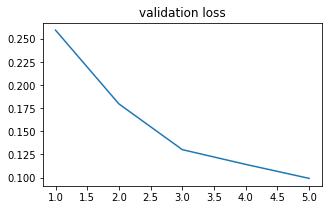

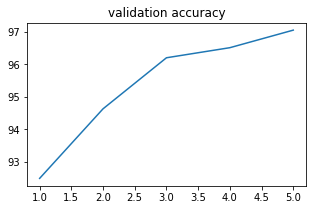

In [0]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');

# Predicting the Price of Housing


Here we will apply what we have learned on a regression problem. In regression problems we try to predict a continous variable as opposed to classes or different categories. We saw an expample of regression in the previous chapter where we trying to predict the progression of diabetes as measured by a continuous variable. 

In this chapter we will look at predicting the price of homes based on several socio-economic variables. This dataset was originally prepared by researchers from Carnegie Mellon University and is hosted on several data sharing platforms. We will be using the dataset hosted by Scikit-Learn. From the Scikit-Learn website, the input variables that are used for predicting housing prices are:

	
- `CRIM`: per capita crime rate by town
- `ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`: proportion of non-retail business acres per town
- `CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- `NOX`: nitric oxides concentration (parts per 10 million)
- `RM`: average number of rooms per dwelling
- `AGE`: proportion of owner-occupied units built prior to 1940
- `DIS`: weighted distances to five Boston employment centres
- `RAD`: index of accessibility to radial highways
- `TAX`: full-value property-tax rate per $10,000
- `PTRATIO`: pupil-teacher ratio by town
- `B 1000(Bk - 0.63)^2`: where Bk is the proportion of blacks by town
- `LSTAT`: % lower status of the population

These features are then used to predict the target:

- `MEDV`: Median value of owner-occupied homes in $1000’s


### Aside: the issue of disparate impact and ML fairness

As machine learning has continued to grow ever more present in daily lives, many have raised concerns over the ethical implications of developing such models. While the development of fair and ethical ML is beyond the scope of this book (and indeed still developing), we still would like to bring awareness to readers the very real nature of this issue. In this example we can see potentially an ML model making deeper societal impacts. As the valuation of homes is used in investment and financial contexts, such models can be biased against historically disadvantaged groups. It is important that our models not be dependent on sensitive variables that can have unwiedly influence. 

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

import torch.nn as nn
import torch.nn.functional as F

We use the `scikit-learn.datasets` module to import the housing data set. Since this dataset is small, we convert the loaded NumPy arrays to PyTorch tensors. 

In [0]:
boston = load_boston()


X_train, X_test, y_train, y_test = train_test_split(np.array(boston.data), 
                                                    np.array(boston.target))


As is typical, we scale the inputs to the network. The `StandardScaler` class from Scikit-learn provides us convinient functions for this. 

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Next we will setup the dataset 

In [0]:
class BostonDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).float()


    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
dataset_train = BostonDataset(X_train, y_train)
dataset_val = BostonDataset(X_train, y_train)

dataloader_train = DataLoader(dataset_train, batch_size=4, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=4, shuffle=False)    

For the network we will setup a simple design:

In [0]:
class Net(nn.Module):
    def __init__(self, hidden_size = 50):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        z = torch.relu(self.fc1(x))
        z = torch.relu(self.fc2(z)) + z
        z = torch.relu(self.fc3(z)) + z
        return self.fc4(z).squeeze()
    
    
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")    



model = Net(hidden_size = 50).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

print(model)

We will define the train and test helper functions

In [0]:
def train(epoch, dataloader, model, criterion, optimizer, device):
    model.train()
    total_losses = []
    for i_batch, (X_batch, y_batch) in enumerate(dataloader):
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        output = model(X_batch)


        loss = criterion(output, y_batch)
        total_losses.append(loss.item())
        

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
   
    return np.mean(total_losses)
        
        
def validation(epoch, dataloader, model, criterion, device):
    model.eval()
    total_losses = []
    for i_batch, (X_batch, y_batch) in enumerate(dataloader):
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        output = model(X_batch)

        loss = criterion(output, y_batch)


        total_losses.append(loss.item())
    
    return np.mean(total_losses)

Iteratre through the learning

In [0]:
num_epochs = 100
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    train_losses.append(train(epoch, dataloader_train, model, criterion, 
                              optimizer, device))
    
    

    
    test_losses.append(validation(epoch, dataloader_val, model, criterion, 
                                      device))
    
    if epoch%10 == 0:
        print("Train loss:", str(train_losses[-1]), 
              " Test Loss:", str(test_losses[-1]))


Train loss: 275.3039780265407  Test Loss: 50.00608474455382
Train loss: 12.747697494531932  Test Loss: 12.303003052033876
Train loss: 9.570733691516676  Test Loss: 8.40562086481797
Train loss: 7.746088411776643  Test Loss: 6.823711379578239
Train loss: 6.025783428196844  Test Loss: 5.960394691166125
Train loss: 5.344616805369917  Test Loss: 4.494842964881345
Train loss: 4.985672436732995  Test Loss: 3.8823556925121108
Train loss: 4.139282952954894  Test Loss: 4.465896533037487
Train loss: 3.72100325164042  Test Loss: 3.35783042986142
Train loss: 3.4109698043057795  Test Loss: 4.812321106383675


Finally we plot the learning curves

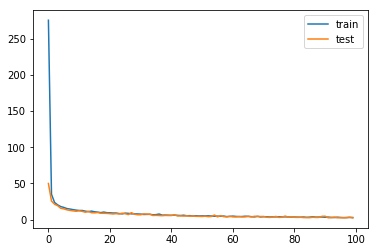

In [0]:
plt.plot(train_losses, label = 'train')
plt.plot(test_losses, label='test')
plt.legend();